In [273]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.spatial import distance
import seaborn as sns

In [274]:
cdf = pd.read_csv("datos_de_clientes.csv", delimiter="\t")
cdf

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


Lograr separar las columnas


In [275]:
edadMinima = cdf['Year_Birth'].max()
edadMinima

1996

Teniendo en cuenta que las campañas pueden estar tambien enfocadas en rangos de edades, el maximo año de nacimiento es 1996, y siendo para este año 2024 dicha persona tendria 28 años, indicando que todos son mayores de edad las propuestas van a estar dirigidas a mayores de edad

In [276]:
proteinas = cdf.iloc[:, [11,12]]
proteinas

,MntMeatProducts,MntFishProducts
0,546,172
1,6,2
2,127,111
3,20,10
4,118,46
...,...,...
2235,182,42
2236,30,0
2237,217,32
2238,214,80


Verifica si las dos columnas son numericas

In [277]:
cdf['MntProteinProducts'] = cdf['MntMeatProducts'] + cdf['MntFishProducts']
cdf

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,MntProteinProducts
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,3,11,1,718
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,3,11,0,8
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,3,11,0,238
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,3,11,0,30
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,3,11,0,164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,0,0,0,0,0,0,3,11,0,224
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,0,0,0,1,0,0,3,11,0,30
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,0,1,0,0,0,0,3,11,0,249
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,0,0,0,0,0,0,3,11,0,294


Crear una columna nueva la cual combine carnes y peces en una de proteinas

In [278]:
proteinas = cdf.iloc[:, [29]]
proteinas

,MntProteinProducts
0,718
1,8
2,238
3,30
4,164
...,...
2235,224
2236,30
2237,249
2238,294


Verificar que existe

In [279]:
proteinas = cdf.pop('MntProteinProducts')
cdf.insert(11, 'MntProteinProducts', proteinas)
proteinas = cdf.iloc[:, [11]]
proteinas

,MntProteinProducts
0,718
1,8
2,238
3,30
4,164
...,...
2235,224
2236,30
2237,249
2238,294


Reposiciona la columna nueva

In [280]:
cdf = cdf.drop(['MntMeatProducts', 'MntFishProducts'], axis=1)
cdf

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


Dropea las columnas de carne y peces por que ya esta el de proteinas

In [281]:
idx_columnas = cdf.columns.tolist()
for idx, nombre_columna in enumerate(idx_columnas):
    print(f"Índice de la columna '{nombre_columna}': {idx}")

Índice de la columna 'ID': 0
Índice de la columna 'Year_Birth': 1
Índice de la columna 'Education': 2
Índice de la columna 'Marital_Status': 3
Índice de la columna 'Income': 4
Índice de la columna 'Kidhome': 5
Índice de la columna 'Teenhome': 6
Índice de la columna 'Dt_Customer': 7
Índice de la columna 'Recency': 8
Índice de la columna 'MntWines': 9
Índice de la columna 'MntFruits': 10
Índice de la columna 'MntProteinProducts': 11
Índice de la columna 'MntSweetProducts': 12
Índice de la columna 'MntGoldProds': 13
Índice de la columna 'NumDealsPurchases': 14
Índice de la columna 'NumWebPurchases': 15
Índice de la columna 'NumCatalogPurchases': 16
Índice de la columna 'NumStorePurchases': 17
Índice de la columna 'NumWebVisitsMonth': 18
Índice de la columna 'AcceptedCmp3': 19
Índice de la columna 'AcceptedCmp4': 20
Índice de la columna 'AcceptedCmp5': 21
Índice de la columna 'AcceptedCmp1': 22
Índice de la columna 'AcceptedCmp2': 23
Índice de la columna 'Complain': 24
Índice de la columna

Conocer los index de las columnas

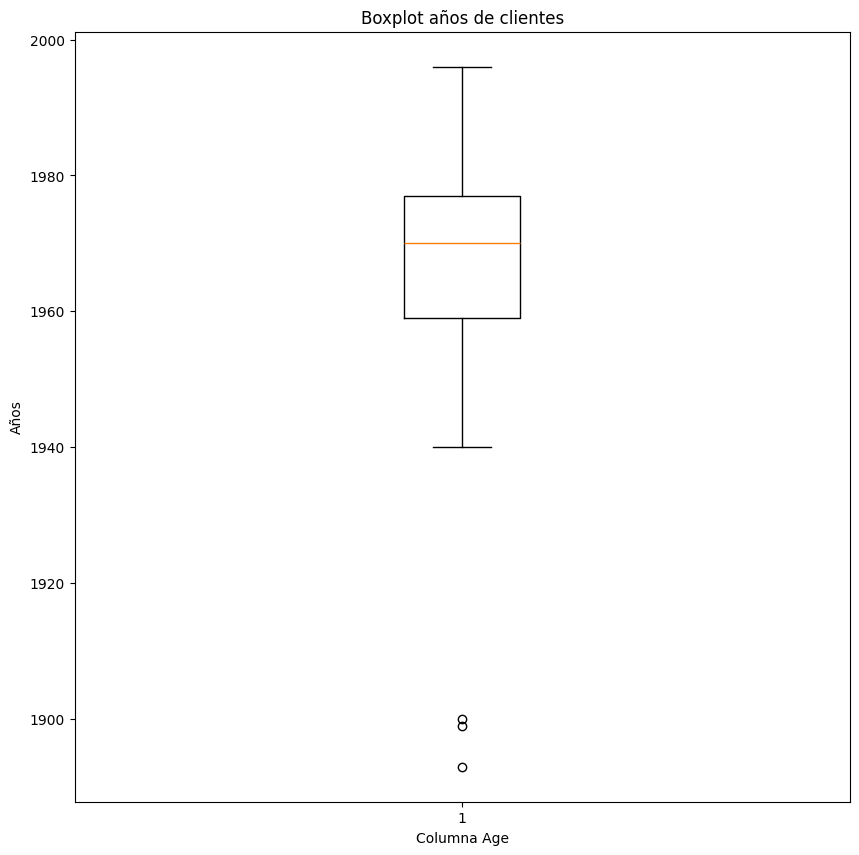

In [282]:
years = cdf.iloc[:, 1]
plt.figure(figsize =(10, 10))
plt.boxplot(years)
plt.title('Boxplot años de clientes')
plt.ylabel('Años')
plt.xlabel('Columna Age')
plt.show()

In [283]:
cdf = cdf[cdf.Year_Birth > 1920]

In [284]:
tiempo_actual = 2024
cdf['Age'] = tiempo_actual - cdf['Year_Birth']
edad = cdf.pop('Age')
cdf.insert(2, 'Age', edad)

C:\Users\Deutsch\AppData\Local\Temp\ipykernel_18508\3321122870.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf['Age'] = tiempo_actual - cdf['Year_Birth']


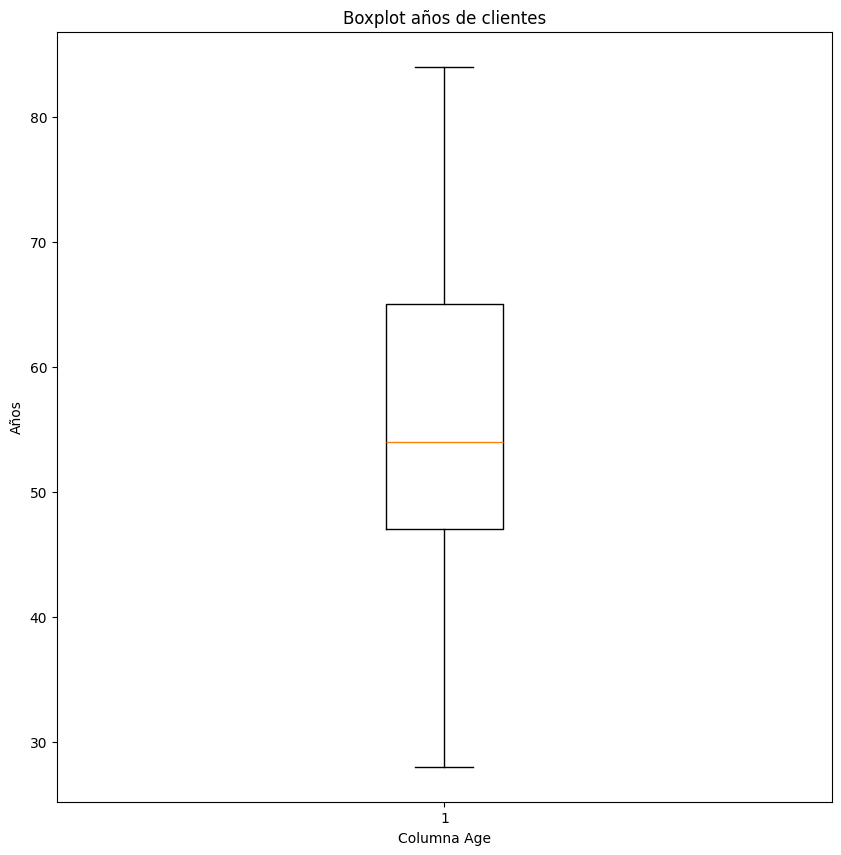

El valor de la mediana es  54.0
El valor de la media es  55.098345999105945


In [285]:
edad = cdf.iloc[:, 2]
mediana = np.median(edad)
media = np.mean(edad)
plt.figure(figsize =(10, 10))
plt.boxplot(edad)
plt.title('Boxplot años de clientes')
plt.ylabel('Años')
plt.xlabel('Columna Age')
plt.show()
print("El valor de la mediana es ", mediana)
print("El valor de la media es ", media)

Analisis de año de nacimiento para luego convertirlo en edad de los clientes para encontrar si hay atipicos y eliminarlos, la media y la mediana que tiene

In [286]:
cdf = cdf.drop(['Education', 'Dt_Customer', 'Recency', 'Complain', 'NumWebVisitsMonth', 'Z_CostContact', 'Z_Revenue'], axis=1)
cdf

,ID,Year_Birth,Age,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntProteinProducts,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response
0,5524,1957,67,Single,58138.0,0,0,635,88,718,...,3,8,10,4,0,0,0,0,0,1
1,2174,1954,70,Single,46344.0,1,1,11,1,8,...,2,1,1,2,0,0,0,0,0,0
2,4141,1965,59,Together,71613.0,0,0,426,49,238,...,1,8,2,10,0,0,0,0,0,0
3,6182,1984,40,Together,26646.0,1,0,11,4,30,...,2,2,0,4,0,0,0,0,0,0
4,5324,1981,43,Married,58293.0,1,0,173,43,164,...,5,5,3,6,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,57,Married,61223.0,0,1,709,43,224,...,2,9,3,4,0,0,0,0,0,0
2236,4001,1946,78,Together,64014.0,2,1,406,0,30,...,7,8,2,5,0,0,0,1,0,0
2237,7270,1981,43,Divorced,56981.0,0,0,908,48,249,...,1,2,3,13,0,1,0,0,0,0
2238,8235,1956,68,Together,69245.0,0,1,428,30,294,...,2,6,5,10,0,0,0,0,0,0


In [287]:
idx_columnas = cdf.columns.tolist()
for idx, nombre_columna in enumerate(idx_columnas):
    print(f"Índice de la columna '{nombre_columna}': {idx}")

Índice de la columna 'ID': 0
Índice de la columna 'Year_Birth': 1
Índice de la columna 'Age': 2
Índice de la columna 'Marital_Status': 3
Índice de la columna 'Income': 4
Índice de la columna 'Kidhome': 5
Índice de la columna 'Teenhome': 6
Índice de la columna 'MntWines': 7
Índice de la columna 'MntFruits': 8
Índice de la columna 'MntProteinProducts': 9
Índice de la columna 'MntSweetProducts': 10
Índice de la columna 'MntGoldProds': 11
Índice de la columna 'NumDealsPurchases': 12
Índice de la columna 'NumWebPurchases': 13
Índice de la columna 'NumCatalogPurchases': 14
Índice de la columna 'NumStorePurchases': 15
Índice de la columna 'AcceptedCmp3': 16
Índice de la columna 'AcceptedCmp4': 17
Índice de la columna 'AcceptedCmp5': 18
Índice de la columna 'AcceptedCmp1': 19
Índice de la columna 'AcceptedCmp2': 20
Índice de la columna 'Response': 21


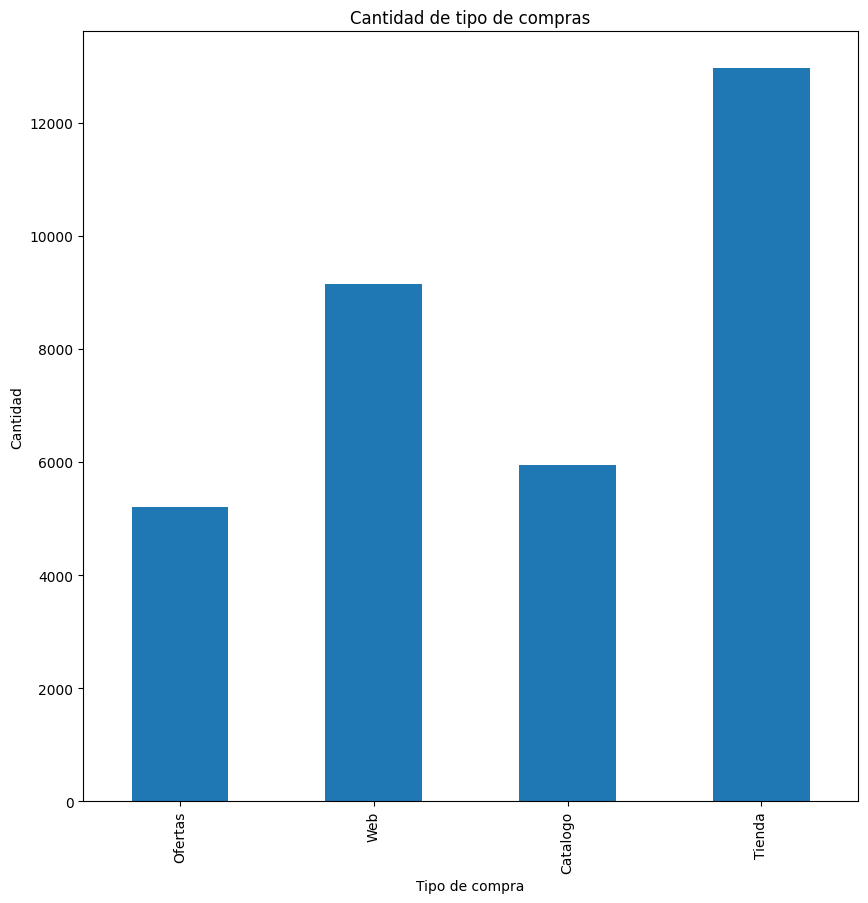

In [288]:
suma_ofertas = cdf['NumDealsPurchases'].sum()
suma_web = cdf['NumWebPurchases'].sum()
suma_catalogo = cdf['NumCatalogPurchases'].sum()
suma_tienda = cdf['NumStorePurchases'].sum()

cantidad_compras = pd.Series([suma_ofertas, suma_web, suma_catalogo, suma_tienda])
plt.figure(figsize=(10,10))
cantidad_compras.plot(kind='bar')
plt.title('Cantidad de tipo de compras')
plt.xlabel('Tipo de compra')
plt.ylabel('Cantidad')
plt.xticks(range(len(cantidad_compras)), ['Ofertas', 'Web', 'Catalogo', 'Tienda'])
plt.show()

In [289]:
estado_social = set(cdf["Marital_Status"])
estado_social

{'Absurd',
 'Alone',
 'Divorced',
 'Married',
 'Single',
 'Together',
 'Widow',
 'YOLO'}

Aqui nos damos cuenta que los estados sociales hay tres en especifico que no tienen nada ver, siendo absurd, yolo y alone

In [290]:
absurd = 'Absurd'
conteo_social_absurd = (cdf['Marital_Status'] == absurd).sum()
print(f'El estado "{absurd}" se repite {conteo_social_absurd} veces.')

yolo = 'YOLO'
conteo_social_yolo = (cdf['Marital_Status'] == yolo).sum()
print(f'El estado "{yolo}" se repite {conteo_social_absurd} veces.')

alone = 'Alone'
conteo_social_alone = (cdf['Marital_Status'] == alone).sum()
print(f'El estado "{alone}" se repite {conteo_social_absurd} veces.')

El estado "Absurd" se repite 2 veces.
El estado "YOLO" se repite 2 veces.
El estado "Alone" se repite 2 veces.


Tal como se ve absurd y yolo se repiten 2 veces, siendo asi que no aporta nada a la data, por lo cual lo dropeamos, pero alone se puede entender como single, entonces lo convertimos a single

In [291]:
cdf = cdf.drop(cdf[cdf['Marital_Status'] == 'YOLO'].index)
cdf = cdf.drop(cdf[cdf['Marital_Status'] == 'Absurd'].index)
cdf = cdf.replace('Alone', 'Single')

estado_social = set(cdf["Marital_Status"])
estado_social


{'Divorced', 'Married', 'Single', 'Together', 'Widow'}

Ya con esto tenemos los datos importantes para nuetro analisis

In [292]:
cdf.iloc[:,3]

social_numerico = pd.get_dummies(cdf.iloc[:,3], dtype=int)
cdf = pd.concat([cdf, social_numerico], axis=1)
cdf = cdf.drop('Marital_Status', axis=1)
social_numerico

,Divorced,Married,Single,Together,Widow
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,1,0,0,0
...,...,...,...,...,...
2235,0,1,0,0,0
2236,0,0,0,1,0
2237,1,0,0,0,0
2238,0,0,0,1,0


In [293]:
cdf['Young_Sons'] = cdf['Kidhome'] + cdf['Teenhome']
hijos = cdf.pop('Young_Sons')
cdf.insert(7, 'Young_Sons', hijos)
hijos = cdf.iloc[:, [7]]
cdf = cdf.drop(['Kidhome', 'Teenhome'], axis=1)

In [294]:
idx_columnas = cdf.columns.tolist()
for idx, nombre_columna in enumerate(idx_columnas):
    print(f"Índice de la columna '{nombre_columna}': {idx}")

Índice de la columna 'ID': 0
Índice de la columna 'Year_Birth': 1
Índice de la columna 'Age': 2
Índice de la columna 'Income': 3
Índice de la columna 'MntWines': 4
Índice de la columna 'Young_Sons': 5
Índice de la columna 'MntFruits': 6
Índice de la columna 'MntProteinProducts': 7
Índice de la columna 'MntSweetProducts': 8
Índice de la columna 'MntGoldProds': 9
Índice de la columna 'NumDealsPurchases': 10
Índice de la columna 'NumWebPurchases': 11
Índice de la columna 'NumCatalogPurchases': 12
Índice de la columna 'NumStorePurchases': 13
Índice de la columna 'AcceptedCmp3': 14
Índice de la columna 'AcceptedCmp4': 15
Índice de la columna 'AcceptedCmp5': 16
Índice de la columna 'AcceptedCmp1': 17
Índice de la columna 'AcceptedCmp2': 18
Índice de la columna 'Response': 19
Índice de la columna 'Divorced': 20
Índice de la columna 'Married': 21
Índice de la columna 'Single': 22
Índice de la columna 'Together': 23
Índice de la columna 'Widow': 24


In [295]:
divorciados = cdf.pop('Divorced')
cdf.insert(3, 'Divorced', divorciados)
casados = cdf.pop('Married')
cdf.insert(4, 'Married', casados)
solteros = cdf.pop('Single')
cdf.insert(5, 'Single', solteros)
juntos = cdf.pop('Together')
cdf.insert(6, 'Together', juntos)
viudos = cdf.pop('Widow')
cdf.insert(7, 'Widow', viudos)
cdf

,ID,Year_Birth,Age,Divorced,Married,Single,Together,Widow,Income,MntWines,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response
0,5524,1957,67,0,0,1,0,0,58138.0,635,...,3,8,10,4,0,0,0,0,0,1
1,2174,1954,70,0,0,1,0,0,46344.0,11,...,2,1,1,2,0,0,0,0,0,0
2,4141,1965,59,0,0,0,1,0,71613.0,426,...,1,8,2,10,0,0,0,0,0,0
3,6182,1984,40,0,0,0,1,0,26646.0,11,...,2,2,0,4,0,0,0,0,0,0
4,5324,1981,43,0,1,0,0,0,58293.0,173,...,5,5,3,6,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,57,0,1,0,0,0,61223.0,709,...,2,9,3,4,0,0,0,0,0,0
2236,4001,1946,78,0,0,0,1,0,64014.0,406,...,7,8,2,5,0,0,0,1,0,0
2237,7270,1981,43,1,0,0,0,0,56981.0,908,...,1,2,3,13,0,1,0,0,0,0
2238,8235,1956,68,0,0,0,1,0,69245.0,428,...,2,6,5,10,0,0,0,0,0,0


In [296]:
idx_columnas = cdf.columns.tolist()
for idx, nombre_columna in enumerate(idx_columnas):
    print(f"Índice de la columna '{nombre_columna}': {idx}")

Índice de la columna 'ID': 0
Índice de la columna 'Year_Birth': 1
Índice de la columna 'Age': 2
Índice de la columna 'Divorced': 3
Índice de la columna 'Married': 4
Índice de la columna 'Single': 5
Índice de la columna 'Together': 6
Índice de la columna 'Widow': 7
Índice de la columna 'Income': 8
Índice de la columna 'MntWines': 9
Índice de la columna 'Young_Sons': 10
Índice de la columna 'MntFruits': 11
Índice de la columna 'MntProteinProducts': 12
Índice de la columna 'MntSweetProducts': 13
Índice de la columna 'MntGoldProds': 14
Índice de la columna 'NumDealsPurchases': 15
Índice de la columna 'NumWebPurchases': 16
Índice de la columna 'NumCatalogPurchases': 17
Índice de la columna 'NumStorePurchases': 18
Índice de la columna 'AcceptedCmp3': 19
Índice de la columna 'AcceptedCmp4': 20
Índice de la columna 'AcceptedCmp5': 21
Índice de la columna 'AcceptedCmp1': 22
Índice de la columna 'AcceptedCmp2': 23
Índice de la columna 'Response': 24
